## GET AROUND

## IMPORTATIONS

In [1]:
# Libraries :

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
# Dataset :

dataset=pd.read_csv('get_around_pricing_project.csv')

In [3]:
dataset.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


## DATA EXPLORATION

In [5]:
# Basic stats :

print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Number of columns : {}".format(dataset.shape[1]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 4843

Number of columns : 15

Display of dataset: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basics statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [6]:
column_types = dataset.dtypes
print(column_types)

Unnamed: 0                    int64
model_key                    object
mileage                       int64
engine_power                  int64
fuel                         object
paint_color                  object
car_type                     object
private_parking_available      bool
has_gps                        bool
has_air_conditioning           bool
automatic_car                  bool
has_getaround_connect          bool
has_speed_regulator            bool
winter_tires                   bool
rental_price_per_day          int64
dtype: object


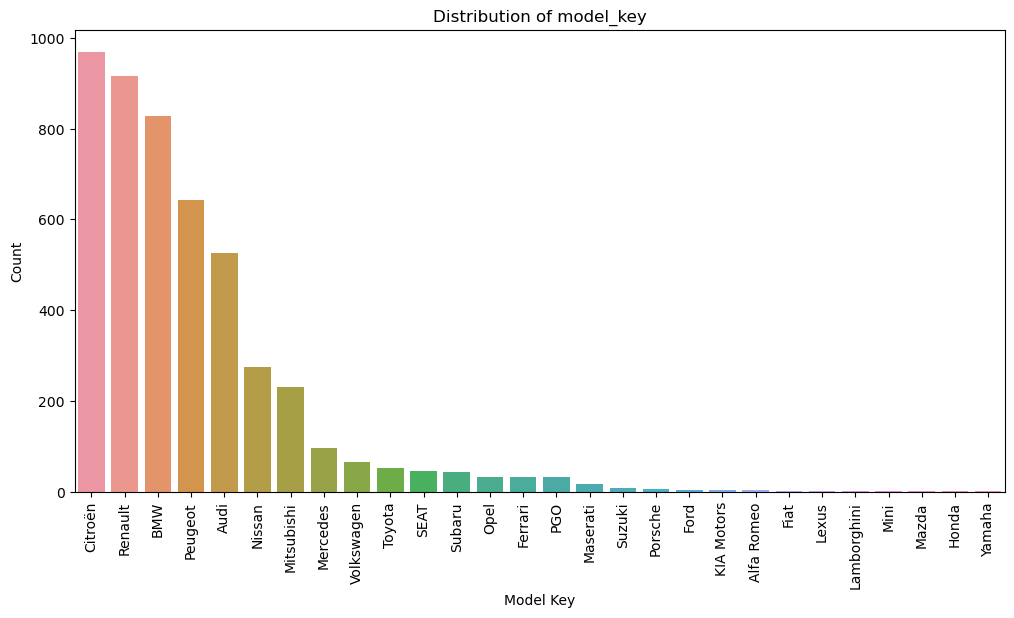

In [7]:
# Visualization of the distribution of different cars' models :
plt.figure(figsize=(12, 6))
sns.countplot(x='model_key', data=dataset, order=dataset['model_key'].value_counts().index)
plt.title('Distribution of model_key')
plt.xlabel('Model Key')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

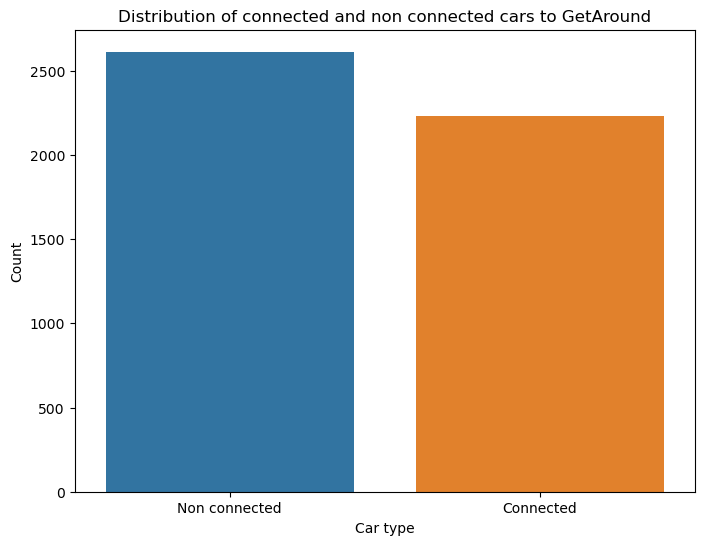

In [10]:
# Visualization of the ditribution of connected and non connected cars :

distribution = dataset['has_getaround_connect'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=distribution.index, y=distribution.values)
plt.title('Distribution of connected and non connected cars to GetAround')
plt.xlabel('Car type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non connected', 'Connected'])
plt.show()


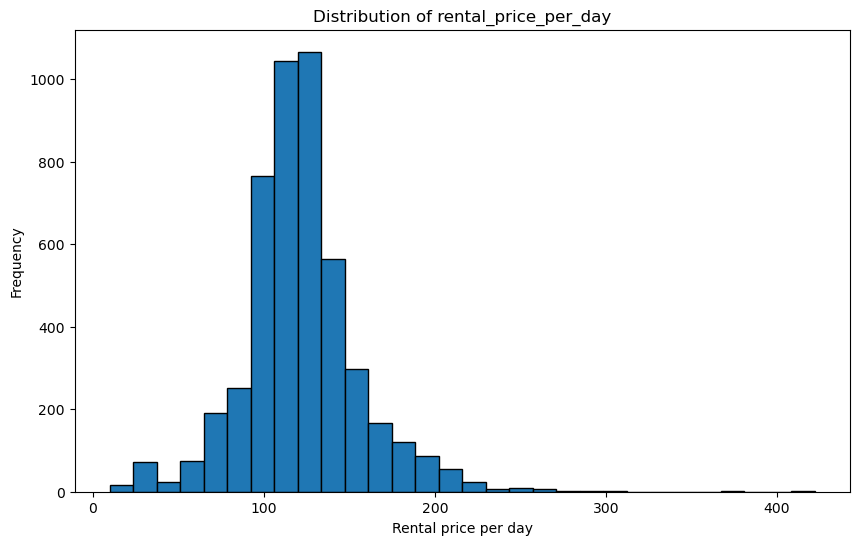

In [11]:
# Visualization of the distribution of the rental price per day :

plt.figure(figsize=(10, 6))
plt.hist(dataset['rental_price_per_day'], bins=30, edgecolor='black')
plt.title('Distribution of rental_price_per_day')
plt.xlabel('Rental price per day')
plt.ylabel('Frequency')
plt.show()

## PREPROCESSING

In [12]:
dataset=dataset.drop(columns=['Unnamed: 0'])

In [13]:
# Separating features from target :

print("Separating labels from features...")
target = 'rental_price_per_day'

X = dataset.drop(columns=[target])
Y = dataset[target]

print("...Done.")
print()

print("Y : ")
print(Y.head())
print()
print("X :")
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

X :
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True     

In [14]:
# Dividing into train and test set :

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [16]:
# Definning categorical and numeric features :

numeric_features = []
categorical_features = []


for column in X.columns:
    if pd.api.types.is_numeric_dtype(X[column]) and not pd.api.types.is_bool_dtype(X[column]):
        numeric_features.append(column)
    else:
        categorical_features.append(column)


print("Numeric features : ", numeric_features)
print("Categorical features : ", categorical_features)

Numeric features :  ['mileage', 'engine_power']
Categorical features :  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [18]:
# Pipeline :

numeric_features = ['mileage', 'engine_power']
categorical_features = ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Preprocessor :

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [20]:
# Preprocessings en train set

print("Performing preprocessings on train set...")
print(X_train.head())
X_train_transformed = preprocessor.fit_transform(X_train)
print("...Done.")

print(pd.DataFrame(X_train_transformed).head(5))
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test_transformed = preprocessor.transform(X_test)
print("...Done.")

print(pd.DataFrame(X_test_transformed).head(5))
print()

Performing preprocessings on train set...
     model_key  mileage  engine_power    fuel paint_color car_type  \
4550       BMW   132485           135  diesel       white      suv   
1237   Citroën   131121           135  diesel       black   estate   
3158   Renault   209216           135  diesel        grey    sedan   
900    Peugeot   148986           100  diesel       black   estate   
933    Citroën   170500           135  diesel       black   estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
4550                       True     True                 False          False   
1237                      False     True                 False          False   
3158                       True     True                 False          False   
900                        True     True                 False          False   
933                        True     True                 False          False   

      has_getaround_connect  has_speed_regulator  

## MODEL TRAINING 

In [21]:
# Linear  regression :

# Defining the model 
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training the model
model.fit(X_train, Y_train)

# Predictions :
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculating metrics on test set 
mse = mean_squared_error(Y_test, test_pred)  
rmse = mean_squared_error(Y_test, test_pred, squared=False)  
mae = mean_absolute_error(Y_test, test_pred) 
r2_test = r2_score(Y_test, test_pred)

# Calculating metrics on train set 
r2_train = r2_score(Y_train, train_pred)

# Results 
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)


Mean Squared Error (MSE): 338.53688118924254
Root Mean Squared Error (RMSE): 18.39937176072168
Mean Absolute Error (MAE): 12.541914762510125
R2 on train set:  0.7156703365669155
R2 on test set:  0.6882521767624489


In [22]:
# Random Forest Regressor

# Defining the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
model.fit(X_train, Y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculating metrics on test set 
mse = mean_squared_error(Y_test, test_pred)  
rmse = mean_squared_error(Y_test, test_pred, squared=False) 
mae = mean_absolute_error(Y_test, test_pred) 
r2_test = r2_score(Y_test, test_pred)

# Calculating metrics on train set 
r2_train = r2_score(Y_train, train_pred)

# results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)

Mean Squared Error (MSE): 250.57410340557274
Root Mean Squared Error (RMSE): 15.829532633832647
Mean Absolute Error (MAE): 10.365386996904025
R2 on train set:  0.9643502323193713
R2 on test set:  0.7692542950653537


In [23]:
# Gradient Boosting Regressor :

# defining the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Training the model
model.fit(X_train, Y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculating metrics on test set 
mse = mean_squared_error(Y_test, test_pred)  
rmse = mean_squared_error(Y_test, test_pred, squared=False) 
mae = mean_absolute_error(Y_test, test_pred)  
r2_test = r2_score(Y_test, test_pred)

# Calculating metrics on train set 
r2_train = r2_score(Y_train, train_pred)

# Results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)

Mean Squared Error (MSE): 285.1735473596139
Root Mean Squared Error (RMSE): 16.887082263067647
Mean Absolute Error (MAE): 11.212435272675178
R2 on train set:  0.780957706420385
R2 on test set:  0.7373927699635365


In [24]:
# XGBOOST Regressor

# Defining the model
model = Pipeline(steps=[
        ("Preprocessing", preprocessor),
        ("Regressor",XGBRegressor(learning_rate= 0.05, max_depth= 8, min_child_weight= 4, n_estimators= 150))
    ])

# Training the model
model.fit(X_train, Y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculating metrics on test set 
mse = mean_squared_error(Y_test, test_pred)  
rmse = mean_squared_error(Y_test, test_pred, squared=False)  
mae = mean_absolute_error(Y_test, test_pred)  
r2_test = r2_score(Y_test, test_pred)

# Calculating metrics on train set 
r2_train = r2_score(Y_train, train_pred)

# Results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)

Mean Squared Error (MSE): 245.85016756938768
Root Mean Squared Error (RMSE): 15.679609930396472
Mean Absolute Error (MAE): 10.13454102830129
R2 on train set:  0.9086960980961825
R2 on test set:  0.7736044170044205
